# Building multi layered perceptron with Keras

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


standardise the values

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [7]:
class_names[y_train[0]]

'Ankle boot'

## creating the model

the set helps to make reproducable weights and biases

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(), # converts the multi dimentional array into a single dimentional array
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

displays information about the layer.

**Param #** is the number of weights and biases. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.layers

In [11]:
hiden1 = model.layers[1]

In [12]:
weights, biases = hiden1.get_weights()

In [13]:
weights, biases

(array([[-0.02498247, -0.00527346,  0.04466058, ..., -0.06628074,
         -0.04671576,  0.01165063],
        [ 0.01833005,  0.05570503, -0.03581541, ...,  0.03375147,
         -0.06807618, -0.02775868],
        [ 0.01966543,  0.02089911,  0.01403238, ...,  0.0457742 ,
         -0.05325074,  0.04040796],
        ...,
        [-0.04217877, -0.06552181, -0.01368944, ..., -0.04389317,
          0.02355561, -0.06410296],
        [ 0.05628622,  0.01801503, -0.05232845, ...,  0.02609652,
         -0.06006408, -0.01338488],
        [ 0.02924156, -0.02736413, -0.05973652, ..., -0.07153597,
         -0.02857549, -0.03586676]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## Compiling the model

This code uses the "sparse_categorical_crossentropy" loss because the labels are sparse and the classes are exclusive. If the labels were one-hot vectors, the "categorical_crossentropy" loss would be used instead. For binary classification or multilabel binary classification, the "sigmoid" activation function and "binary_crossentropy" loss would be used instead of "softmax".

the default learning rate for the optimizer is 0.01

In [14]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

## model training

the default batch size is 32

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=100)

Epoch 1/30
550/550 [==============================] - 3s 4ms/step - loss: 0.9725 - accuracy: 0.7006 - val_loss: 0.6483 - val_accuracy: 0.7918
Epoch 2/30
550/550 [==============================] - 2s 4ms/step - loss: 0.5993 - accuracy: 0.8018 - val_loss: 0.5416 - val_accuracy: 0.8226
Epoch 3/30
550/550 [==============================] - 2s 4ms/step - loss: 0.5281 - accuracy: 0.8213 - val_loss: 0.4938 - val_accuracy: 0.8276
Epoch 4/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4923 - accuracy: 0.8330 - val_loss: 0.4677 - val_accuracy: 0.8352
Epoch 5/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4693 - accuracy: 0.8397 - val_loss: 0.4582 - val_accuracy: 0.8360
Epoch 6/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4528 - accuracy: 0.8438 - val_loss: 0.4725 - val_accuracy: 0.8326
Epoch 7/30
550/550 [==============================] - 2s 4ms/step - loss: 0.4384 - accuracy: 0.8485 - val_loss: 0.4322 - val_accuracy: 0.8468
Epoch 

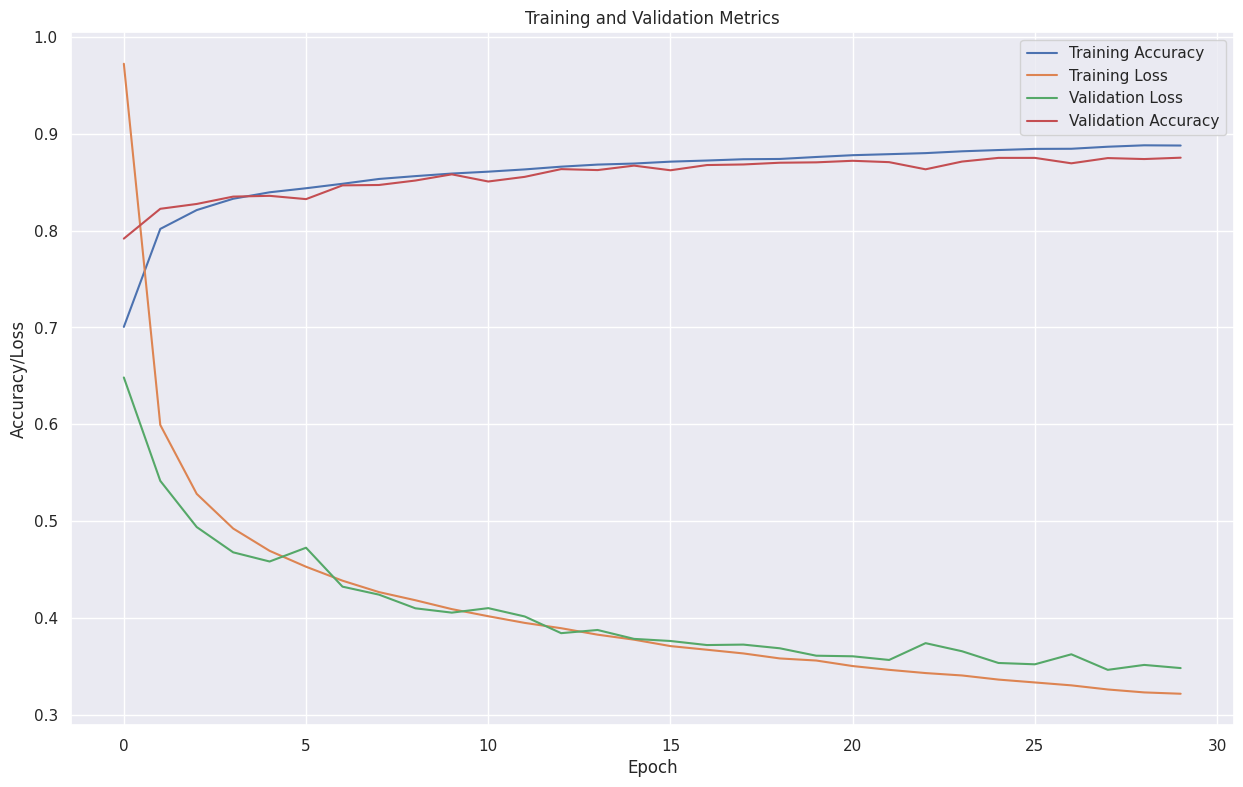

In [16]:
plt.figure(figsize=(15, 9))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8669


[0.3730427026748657, 0.8669000267982483]

In [18]:
model.save('fashion_mnist_model.h5')

/home/ubuntu/ml-handson/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# open the model

model = tf.keras.models.load_model('fashion_mnist_model.h5')

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8669


[0.3730427026748657, 0.8669000267982483]

## optimal hyperparameters

In [24]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

Using TensorFlow backend


In [25]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [26]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [27]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [28]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [35]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters

tuner.get_best_hyperparameters(num_trials=1)[0].values

{'units': 352,
 'learning_rate': 0.001,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}

In [36]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]



In [37]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5002 - accuracy: 0.8216 - val_loss: 0.4163 - val_accuracy: 0.8497
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3712 - accuracy: 0.8646 - val_loss: 0.3753 - val_accuracy: 0.8629
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3339 - accuracy: 0.8755 - val_loss: 0.3333 - val_accuracy: 0.8784
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3062 - accuracy: 0.8867 - val_loss: 0.3323 - val_accuracy: 0.8811
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2923 - accuracy: 0.8916 - val_loss: 0.3333 - val_accuracy: 0.8824
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2724 - accuracy: 0.8984 - val_loss: 0.3372 - val_accuracy: 0.8775
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2589 - accuracy: 0.9030 - val_loss: 0.3133 - val_accuracy:

get the best epoch

In [38]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5011 - accuracy: 0.8214 - val_loss: 0.4098 - val_accuracy: 0.8524
Epoch 2/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3722 - accuracy: 0.8659 - val_loss: 0.3813 - val_accuracy: 0.8608
Epoch 3/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3322 - accuracy: 0.8769 - val_loss: 0.3472 - val_accuracy: 0.8768
Epoch 4/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3057 - accuracy: 0.8873 - val_loss: 0.3253 - val_accuracy: 0.8808
Epoch 5/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2913 - accuracy: 0.8926 - val_loss: 0.3234 - val_accuracy: 0.8856
Epoch 6/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2728 - accuracy: 0.8982 - val_loss: 0.3337 - val_accuracy: 0.8796
Epoch 7/39
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2579 - accuracy: 0.9043 - val_loss: 0.3269 - val_accuracy:

In [39]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8887
[test loss, test accuracy]: [0.5168952345848083, 0.888700008392334]


save hypermodel

In [41]:
hypermodel.save("fasion_mnist_best_model.keras")